# Business Problem

Banner Financial Analytics has been hired by an investment group to do a full time series analysis on the stock price for Amazon. Through time series analysis they would like an general overview of the stock along with any trends that may be present. They would also like to see a modeling approach including future forecasting.

# Import Libraries

In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import itertools


# Import Data

In [2]:
# Import Data using yahoo finance api
import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_analysts_info

In [3]:
# Business analytics for Amazon company
amazon_analysts_info = get_analysts_info("amzn")
amazon_analysts_info

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    40.00                 30.00   
 1     Avg. Estimate                     7.23                  9.07   
 2      Low Estimate                     4.51                  5.91   
 3     High Estimate                    11.16                 11.58   
 4      Year Ago EPS                     6.47                  5.01   
 
    Current Year (2020)  Next Year (2021)  
 0                45.00             47.00  
 1                34.98             45.65  
 2                32.20             34.03  
 3                38.89             63.03  
 4                23.01             34.98  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      40                   31   
 1            Avg. Estimate                  119.7B               95.69B   
 2             Low Estimate           

In [4]:
from yahoo_fin.stock_info import get_quote_table

In [5]:
# most recent quote table for amazon
get_quote_table("amzn")

{'1y Target Est': 3831.77,
 '52 Week Range': '1,626.03 - 3,552.25',
 'Ask': '3,418.50 x 900',
 'Avg. Volume': 3936262.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '3,416.00 x 800',
 "Day's Range": '3,361.12 - 3,427.74',
 'EPS (TTM)': 34.2,
 'Earnings Date': 'Feb 02, 2021',
 'Ex-Dividend Date': nan,
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '1.696T',
 'Open': 3380.0,
 'PE Ratio (TTM)': 98.82,
 'Previous Close': 3342.88,
 'Quote Price': 3380.0,
 'Volume': 5245852.0}

In [6]:
from yahoo_fin.stock_info import get_data

In [7]:
#daily stock info for amazon 
amazon_daily = get_data("amzn", start_date="1/1/2011", end_date="1/21/2021",
                        index_as_date=True, interval="1d")
amazon_daily

,open,high,low,close,adjclose,volume,ticker
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400,AMZN
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800,AMZN
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,AMZN
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,AMZN
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,AMZN
...,...,...,...,...,...,...,...
2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200,AMZN
2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN
2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4214200,AMZN
2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100,AMZN


## Stock EDA

-This section with visualize how the amazon stock price has changed over the past decade along with a closer to how its changed in more recent years. 

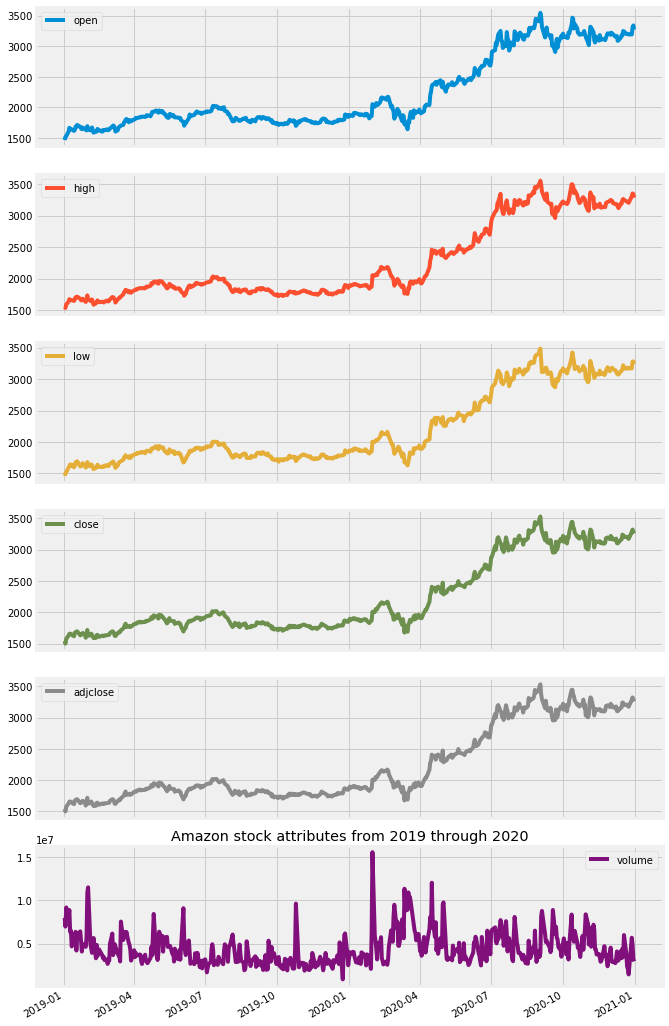

In [8]:
amazon_daily['2019':'2020'].plot(subplots=True, figsize=(10,20))
plt.title('Amazon stock attributes from 2019 through 2020')
plt.show()

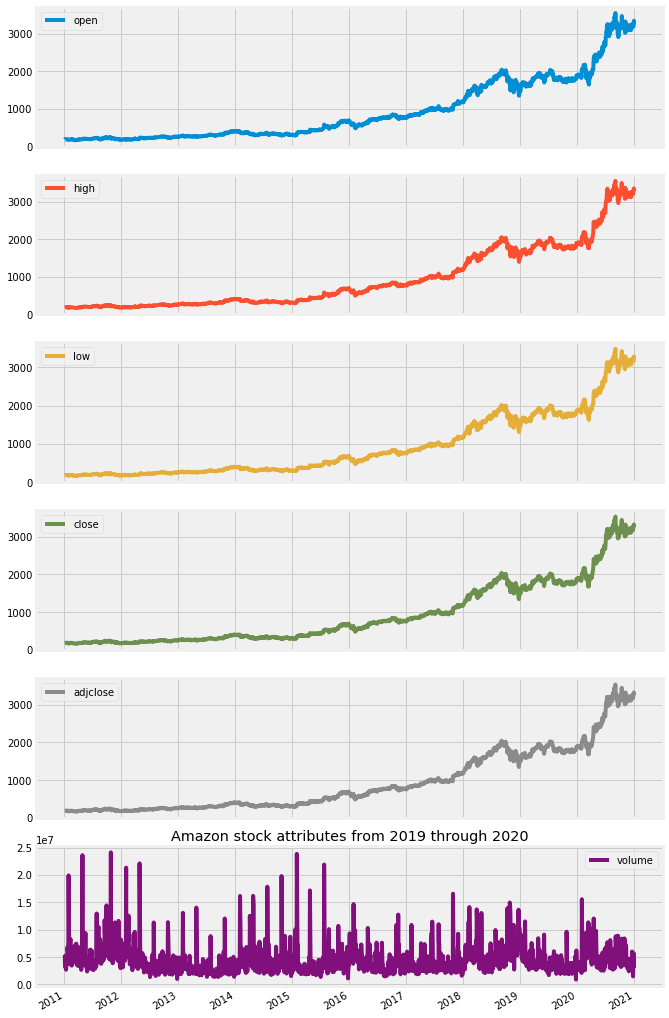

In [9]:
amazon_daily['2011':'2020'].plot(subplots=True, figsize=(10,20))
plt.title('Amazon stock attributes from 2019 through 2020')
plt.show()

In [10]:
#daily stock info for amazon 
amazon_monthly = get_data("amzn", start_date="1/1/2011", end_date="1/1/2021",
                        index_as_date=True, interval="1mo")
amazon_monthly

,open,high,low,close,adjclose,volume,ticker
2011-01-01,181.369995,191.600006,166.899994,169.639999,169.639999,113611300,AMZN
2011-02-01,170.520004,191.399994,169.509995,173.289993,173.289993,95776400,AMZN
2011-03-01,173.529999,181.570007,160.589996,180.130005,180.130005,118979100,AMZN
2011-04-01,181.580002,197.800003,175.369995,195.809998,195.809998,116749400,AMZN
2011-05-01,196.570007,206.389999,190.880005,196.690002,196.690002,106274500,AMZN
...,...,...,...,...,...,...,...
2020-08-01,3180.510010,3495.000000,3073.000000,3450.959961,3450.959961,83535200,AMZN
2020-09-01,3489.580078,3552.250000,2871.000000,3148.729980,3148.729980,115943500,AMZN
2020-10-01,3208.000000,3496.239990,3019.000000,3036.149902,3036.149902,116242300,AMZN
2020-11-01,3061.739990,3366.800049,2950.120117,3168.040039,3168.040039,90810500,AMZN


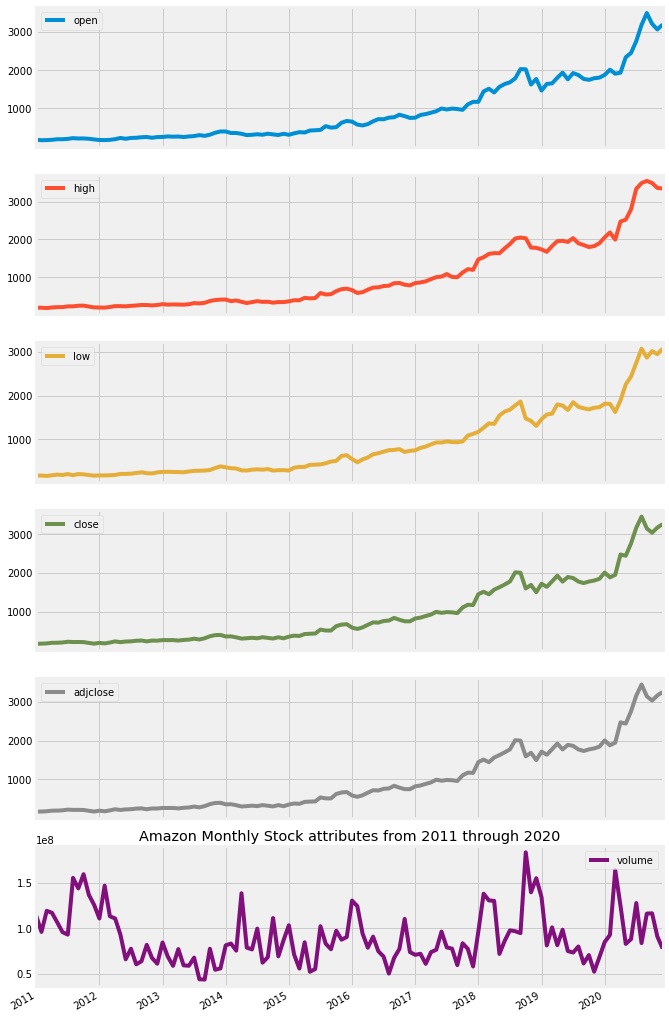

In [11]:
amazon_monthly.plot(subplots=True, figsize=(10,20))
plt.title('Amazon Monthly Stock attributes from 2011 through 2020')
plt.show()

### Using Timestamp

-This section will be exploring timestamp to manipulate the data.

In [12]:
#creating a timestamp
timestamp = pd.Timestamp(2019, 4, 1, 12)
timestamp

Timestamp('2019-04-01 12:00:00')

In [13]:
#creating a period
period = pd.Period('2019-04-01')
period

Period('2019-04-01', 'D')

In [14]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [15]:
#converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2019-04-01 12:00', 'H')

In [16]:
#converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2019-04-01 00:00:00')

### Using Datetime

-This section will be exploring datetime to split the data.

In [17]:
#creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/2019', end='12/31/2019', freq="D")
dr1

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [18]:
#creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/2019', end='12/31/2019', freq='M')
dr2

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

In [19]:
#creating a datetimeindex without using startdate and using periods
dr3 = pd.date_range(end='12/31/2019', periods=8)
dr3

DatetimeIndex(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#creating a datetimeindex specifying start and end date, with periods
dr4 = pd.date_range(start='1/1/2019', end='12/31/2019', periods=3)
dr4

DatetimeIndex(['2019-01-01', '2019-07-02', '2019-12-31'], dtype='datetime64[ns]', freq=None)

## Financial Stats

-Engineering specific financial statistics to further evaluate the stocks performance. 

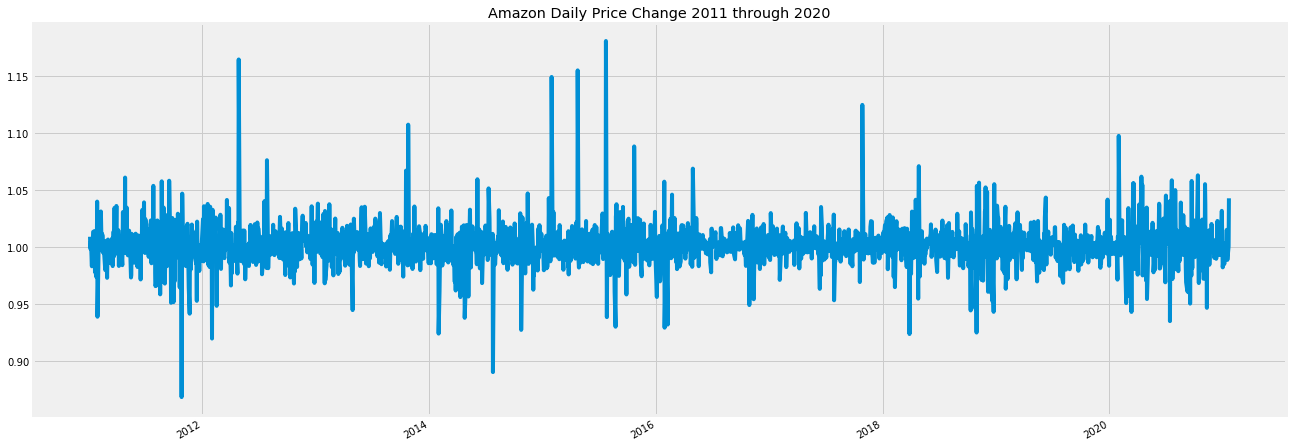

In [21]:
#Percent Change
amazon_daily['change'] = amazon_daily.high.div(amazon_daily.high.shift())
amazon_daily['change'].plot(figsize=(20,8))
plt.title('Amazon Daily Price Change 2011 through 2020')
plt.show()

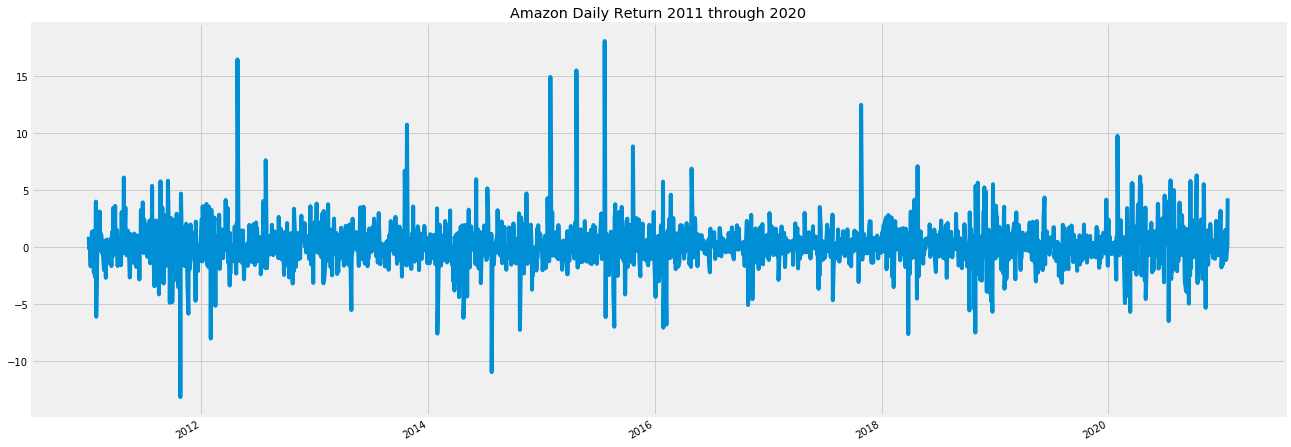

In [22]:
#Stock return
amazon_daily['return'] = amazon_daily.change.sub(1).mul(100)
amazon_daily['return'].plot(figsize=(20,8))
plt.title('Amazon Daily Return 2011 through 2020')
plt.show()

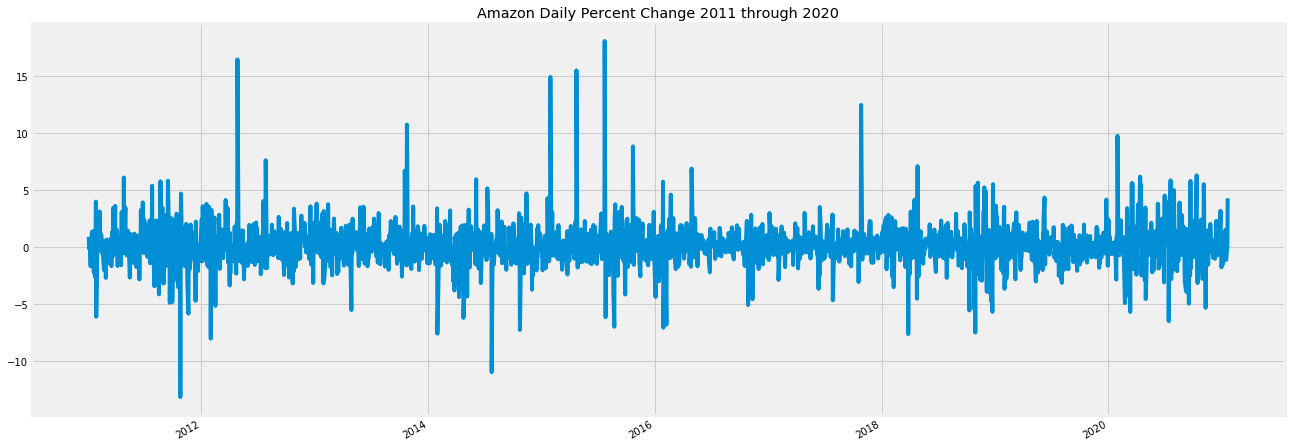

In [23]:
#Stock Return recalculated
amazon_daily.high.pct_change().mul(100).plot(figsize=(20,8))
plt.title('Amazon Daily Percent Change 2011 through 2020')
plt.show()

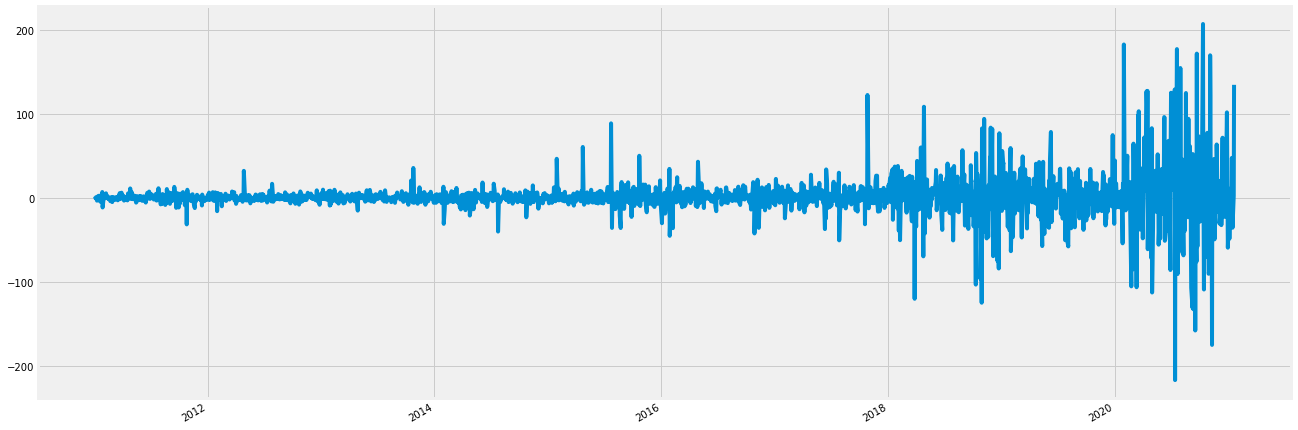

In [24]:
#absolute change
amazon_daily.high.diff().plot(figsize=(20,8))

In [25]:
#new df with enginered columns or change and return
amazon_daily

,open,high,low,close,adjclose,volume,ticker,change,return
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400,AMZN,NaN,NaN
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800,AMZN,1.009140,0.913977
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,AMZN,0.998668,-0.133191
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,AMZN,0.999787,-0.021335
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,AMZN,1.005549,0.554929
...,...,...,...,...,...,...,...,...,...
2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200,AMZN,1.015216,1.521576
2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN,0.996254,-0.374612
2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4214200,AMZN,0.988845,-1.115480
2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100,AMZN,1.000780,0.077961


# Trends and Decomposition

Trends are the main components of a time series.
- Trend - Consistent upwards or downwards slope of a time series
- Seasonality - Clear periodic pattern of a time series(like sine funtion)
- Noise - Outliers or missing values

In [26]:
#Rolling Statistics
roll_mean = amazon_daily['high'].rolling(window=12, center=False).mean()
roll_mean

2011-01-03            NaN
2011-01-04            NaN
2011-01-05            NaN
2011-01-06            NaN
2011-01-07            NaN
                 ...     
2021-01-13    3238.350789
2021-01-14    3227.850789
2021-01-15    3210.509135
2021-01-19    3194.084127
2021-01-20    3193.824137
Name: high, Length: 2529, dtype: float64

In [27]:
roll_std = amazon_daily['high'].rolling(window=12, center=False).std()
roll_std

2011-01-03          NaN
2011-01-04          NaN
2011-01-05          NaN
2011-01-06          NaN
2011-01-07          NaN
                ...    
2021-01-13    70.180948
2021-01-14    68.879618
2021-01-15    60.884554
2021-01-19    47.207581
2021-01-20    46.679490
Name: high, Length: 2529, dtype: float64

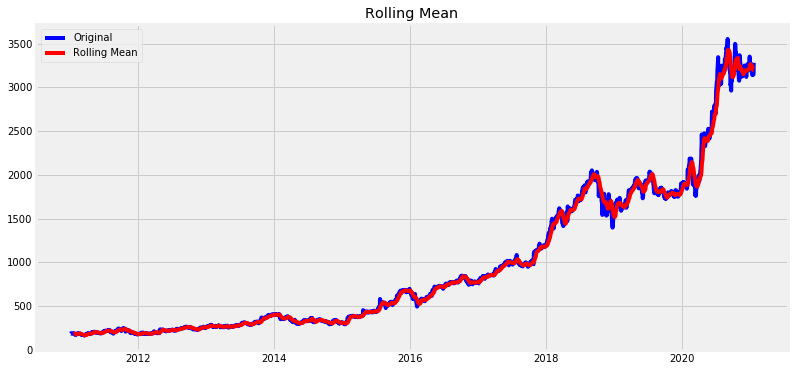

In [28]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(amazon_daily['high'], color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show()

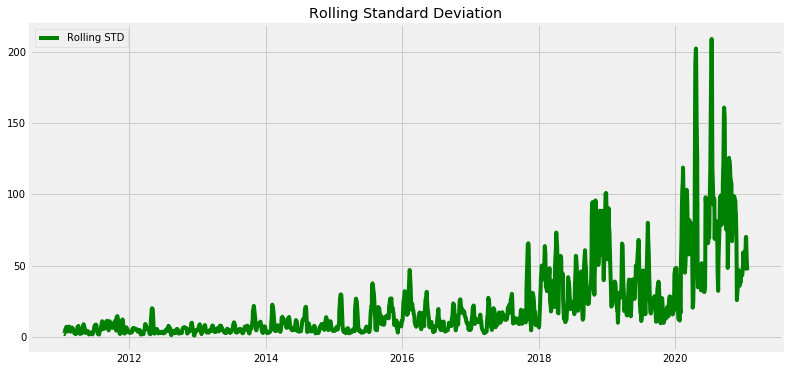

In [29]:
fig = plt.figure(figsize=(12,6))
plt.plot(roll_std, color='green', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation')
plt.show()

## Decomposition

In [30]:
from pylab import rcParams

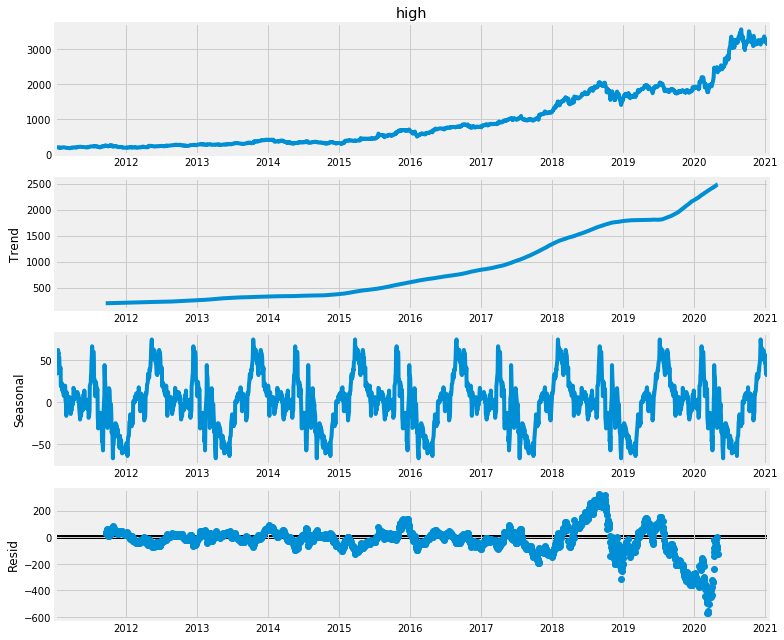

In [31]:
rcParams['figure.figsize'] = 11,9
#anaual frequency
decomposed_amazon_daily = sm.tsa.seasonal_decompose(amazon_daily['high'], freq=360)
figure = decomposed_amazon_daily.plot()
plt.show()

- Clear Upward Trend in the above plot
- Uniform Seasonal Change
- Non-uniform noise that represents outlier and missing valuse

## Dickey Fuller Test

- The Dickey-Fuller test is a common test for determining whether a time series contains trends

In [32]:

from statsmodels.tsa.stattools import adfuller

In [33]:
#test for closeing price
print('Amazong Closing Price dickey-fuller Test: \n')
dftest = adfuller(amazon_daily['close'])
#print legable output
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                         'p-value', 
                                         '#Lags Used', 
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value 
print(dfoutput)

Amazong Closing Price dickey-fuller Test: 

Test Statistic                    2.493391
p-value                           0.999048
#Lags Used                       27.000000
Number of Observations Used    2501.000000
Critical Value (1%)              -3.432967
Critical Value (5%)              -2.862696
Critical Value (10%)             -2.567386
dtype: float64


In [34]:
#differencing closing price
amazon_close_diff = amazon_daily['close'].diff().dropna()
amazon_close_diff

2011-01-04      0.789993
2011-01-05      2.410004
2011-01-06     -1.559998
2011-01-07     -0.369995
2011-01-10     -0.810013
                 ...    
2021-01-13     45.059814
2021-01-14    -38.419922
2021-01-15    -23.219971
2021-01-19     16.510010
2021-01-20    142.619873
Name: close, Length: 2528, dtype: float64

In [35]:
#test for differenced closing price
print('Amazon Closing Price(Differenced) dickey-fuller Test: \n')
dftest_diff = adfuller(amazon_close_diff)
#print legable output
dfoutput_1 = pd.Series(dftest_diff[0:4], index=['Test Statistic', 
                                           'p-value',
                                           '#Lags Used',
                                           'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value 
print(dfoutput_1)

Amazon Closing Price(Differenced) dickey-fuller Test: 

Test Statistic                -1.022749e+01
p-value                        5.131104e-18
#Lags Used                     2.700000e+01
Number of Observations Used    2.500000e+03
dtype: float64


# Correlation and Autocorrelation

In [36]:
#correlation
corr = amazon_daily.corr()
corr

,open,high,low,close,adjclose,volume,change,return
open,1.000000,0.999870,0.999824,0.999695,0.999695,0.073457,0.015289,0.015289
high,0.999870,1.000000,0.999778,0.999849,0.999849,0.077768,0.019419,0.019419
low,0.999824,0.999778,1.000000,0.999859,0.999859,0.067450,0.018850,0.018850
close,0.999695,0.999849,0.999859,1.000000,1.000000,0.072436,0.021591,0.021591
adjclose,0.999695,0.999849,0.999859,1.000000,1.000000,0.072436,0.021591,0.021591
volume,0.073457,0.077768,0.067450,0.072436,0.072436,1.000000,0.065970,0.065970
change,0.015289,0.019419,0.018850,0.021591,0.021591,0.065970,1.000000,1.000000
return,0.015289,0.019419,0.018850,0.021591,0.021591,0.065970,1.000000,1.000000


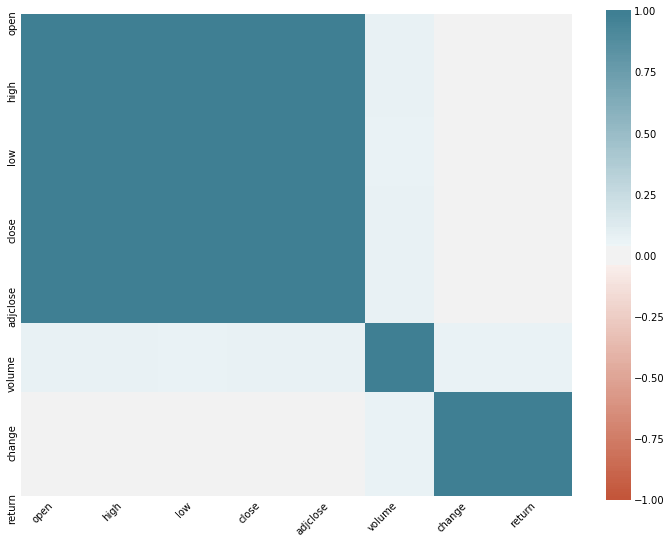

In [37]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## auto correlation


In [38]:
high = amazon_daily['high']

In [39]:
high_shift_1 = high.shift(periods=1)
high_shift_1

2011-01-03            NaN
2011-01-04     186.000000
2011-01-05     187.699997
2011-01-06     187.449997
2011-01-07     187.410004
                 ...     
2021-01-13    3142.139893
2021-01-14    3189.949951
2021-01-15    3178.000000
2021-01-19    3142.550049
2021-01-20    3145.000000
Name: high, Length: 2529, dtype: float64

In [40]:
lag_1 = pd.concat([high_shift_1, high], axis=1)
lag_1.corr()

,high,high
high,1.00000,0.99962
high,0.99962,1.00000


In [41]:
high_shift_2 = high.shift(periods=2)
lag_2 = pd.concat([high_shift_2, high], axis=1)
lag_2.corr()

,high,high
high,1.000000,0.999183
high,0.999183,1.000000


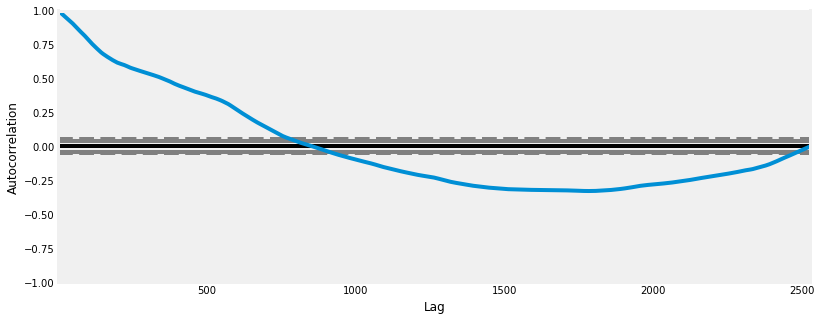

In [42]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(high);

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf

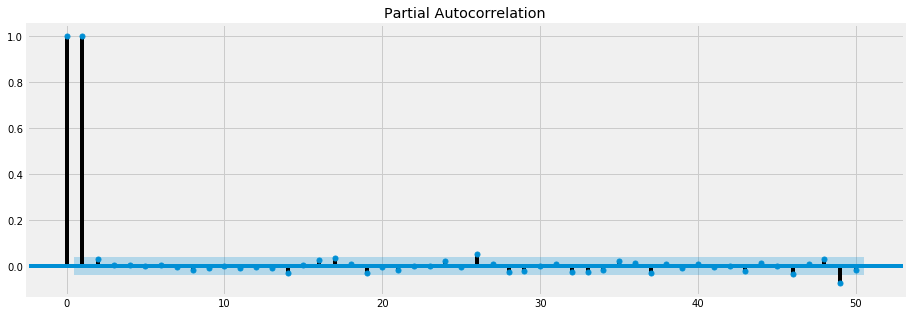

In [44]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(high, lags=50);

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

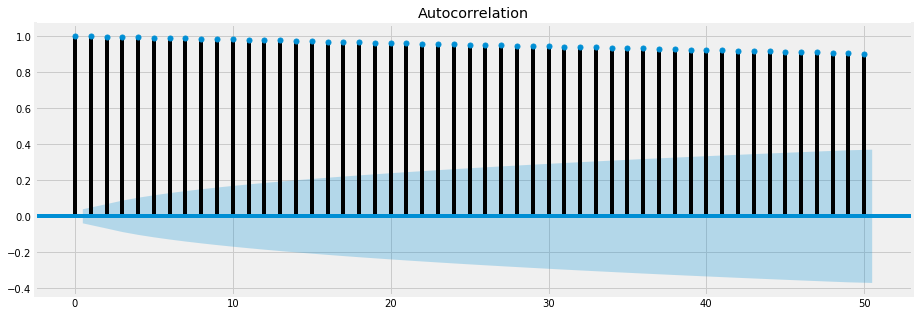

In [46]:
rcParams['figure.figsize'] = 14, 5
plot_acf(high, lags=50);

# Modeling

In [47]:
#import all necessary libraries
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [48]:
#setting index frequency to Daily for modeling 
amazon_daily.index = amazon_daily.index.to_period('D')

## ARMA

Autoregressive-moving-average model is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for autoregression, the second for the moving average.

In [49]:
amazon_close_diff.index = amazon_close_diff.index.to_period('D')

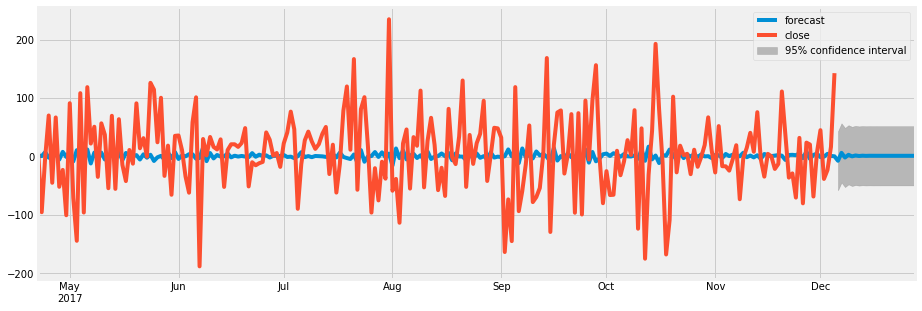

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 2528
Model:                     ARMA(1, 1)   Log Likelihood              -11799.589
Method:                       css-mle   S.D. of innovations             25.755
Date:                Tue, 02 Feb 2021   AIC                          23607.177
Time:                        15:50:15   BIC                          23630.518
Sample:                    01-04-2011   HQIC                         23615.646
                         - 01-20-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2160      0.492      2.473      0.013       0.252       2.180
ar.L1.close    -0.5853      0.104     -5.603      0.000      -0.790      -0.381
ma.L1.close     0.5218      0.109      4.785    

In [50]:
#predicting closing price of amazon
close_predict_diff = ARMA(amazon_close_diff, order=(1,1))
arma_close_diff = close_predict_diff.fit()
arma_close_diff.plot_predict(start=2300, end=2550)
plt.show()
print(arma_close_diff.summary())
print('\n RMSE for arma_close_diff :', np.sqrt(mean_squared_error(amazon_close_diff, arma_close_diff.predict())))

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 2529
Model:                     ARMA(1, 0)   Log Likelihood              -11818.674
Method:                       css-mle   S.D. of innovations             25.861
Date:                Tue, 02 Feb 2021   AIC                          23643.347
Time:                        15:50:15   BIC                          23660.854
Sample:                    01-03-2011   HQIC                         23649.700
                         - 01-20-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1436.9239   1289.204      1.115      0.265   -1089.869    3963.717
ar.L1.close     0.9998      0.000   4626.718      0.000       0.999       1.000
                                    Roots       

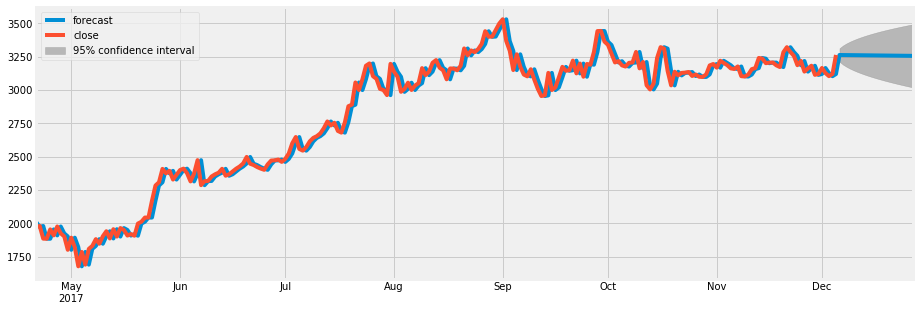

In [51]:
#predicting without differencing
close_predict = ARMA(amazon_daily['close'], order=(1,0))
arma_close = close_predict.fit()
arma_close.plot_predict(start=2300, end=2550)
print(arma_close.summary())
print('\n RMSE for arma_close :', np.sqrt(mean_squared_error(amazon_daily['close'], arma_close.predict())))

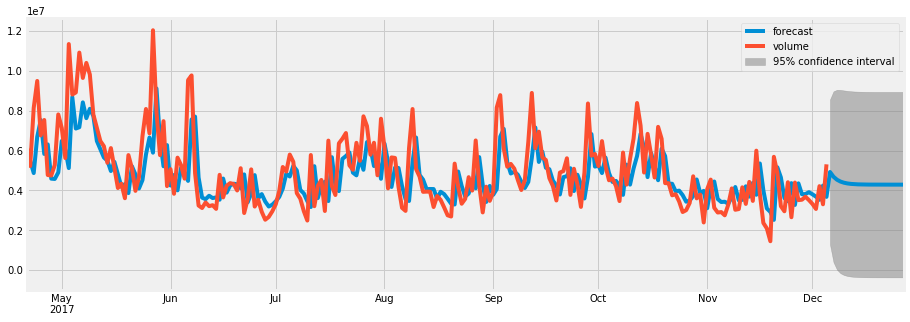

                              ARMA Model Results                              
Dep. Variable:                 volume   No. Observations:                 2529
Model:                     ARMA(1, 0)   Log Likelihood              -40092.986
Method:                       css-mle   S.D. of innovations        1856605.436
Date:                Tue, 02 Feb 2021   AIC                          80191.971
Time:                        15:50:16   BIC                          80209.478
Sample:                    01-03-2011   HQIC                         80198.323
                         - 01-20-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.29e+06   9.79e+04     43.844      0.000     4.1e+06    4.48e+06
ar.L1.volume     0.6230      0.016     40.073      0.000       0.593       0.653
                                    Roots   

In [52]:
#predicting volume of amazon
volume_predict = ARMA(amazon_daily['volume'], order=(1,0))
arma_volume= volume_predict.fit()
arma_volume.plot_predict(start=2300, end=2550)
plt.show()
print(arma_volume.summary())
print('\n RMSE for ARMA_volume :', np.sqrt(mean_squared_error(amazon_daily['volume'], arma_volume.predict())))

In [53]:
#differencing volume 
amazon_volume_diff = amazon_daily['volume'].diff().dropna()
amazon_volume_diff

2011-01-04    -299600.0
2011-01-05   -1613000.0
2011-01-06    -239100.0
2011-01-07    2042000.0
2011-01-10   -1845800.0
                ...    
2021-01-13    -193400.0
2021-01-14    -250300.0
2021-01-15    1143300.0
2021-01-19    -909100.0
2021-01-20    2004700.0
Freq: D, Name: volume, Length: 2528, dtype: float64

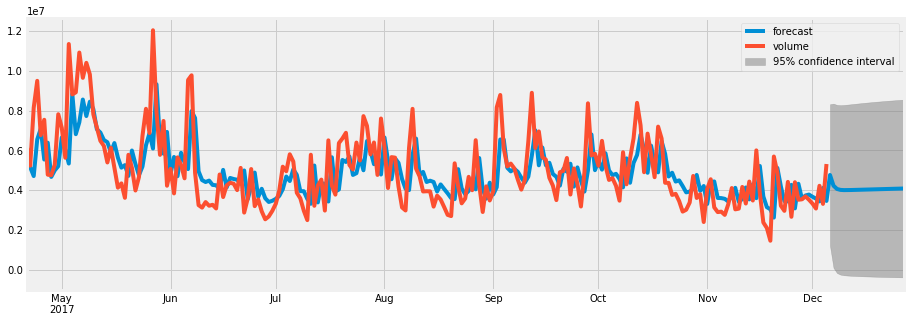

                              ARMA Model Results                              
Dep. Variable:                 volume   No. Observations:                 2529
Model:                     ARMA(2, 2)   Log Likelihood              -40036.180
Method:                       css-mle   S.D. of innovations        1815247.717
Date:                Tue, 02 Feb 2021   AIC                          80084.360
Time:                        15:50:17   BIC                          80119.374
Sample:                    01-03-2011   HQIC                         80097.064
                         - 01-20-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.29e+06   2.53e+05     16.931      0.000    3.79e+06    4.79e+06
ar.L1.volume     1.2916      0.060     21.643      0.000       1.175       1.409
ar.L2.volume    -0.3055      0.056     -5.50

In [54]:
#predicting diference volume of amazon
volume_diff_predict = ARMA(amazon_daily['volume'], order=(2,2))
arma_diff_volume = volume_diff_predict.fit()
arma_diff_volume.plot_predict(start=2300, end=2550)
plt.show()
print(arma_diff_volume.summary())
print('\n RMSE for arma_diff_volume :', np.sqrt(mean_squared_error(amazon_daily['volume'], arma_diff_volume.predict())))

## ARIMA

An autoregressive integrated moving average is a generalization of an autoregressive moving average (ARMA) model.  ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

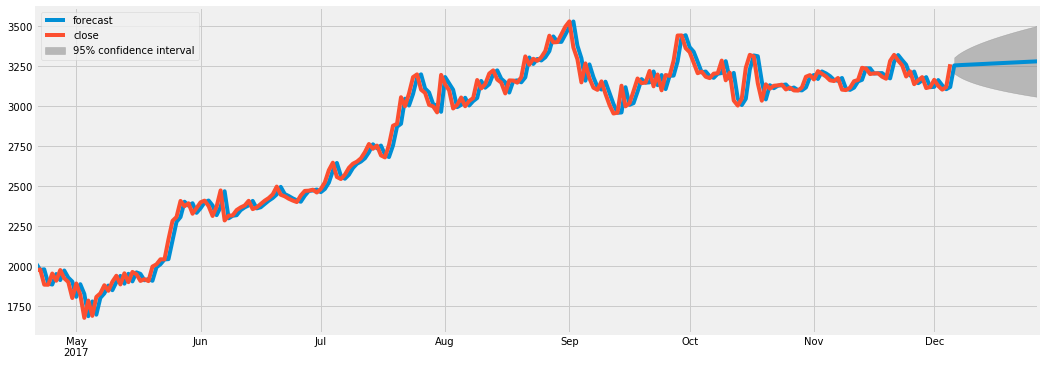

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2528
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11802.200
Method:                       css-mle   S.D. of innovations             25.781
Date:                Tue, 02 Feb 2021   AIC                          23610.400
Time:                        15:50:18   BIC                          23627.905
Sample:                    01-04-2011   HQIC                         23616.751
                         - 01-20-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2147      0.482      2.519      0.012       0.270       2.160
ar.L1.D.close    -0.0635      0.020     -3.179      0.001      -0.103      -0.024
                                    Root

In [55]:
# Predicting amazon close
rcParams['figure.figsize'] = 16, 6
close_predict_1 = ARIMA(amazon_daily['close'], order=(1,1,0))
arima_close = close_predict_1.fit()
arima_close.plot_predict(start=2300, end=2550)
plt.show()
print(arima_close.summary())
print('\n RMSE for Arima_close :', np.sqrt(mean_squared_error(amazon_daily['close'].iloc[1:2529], arima_close.predict())))





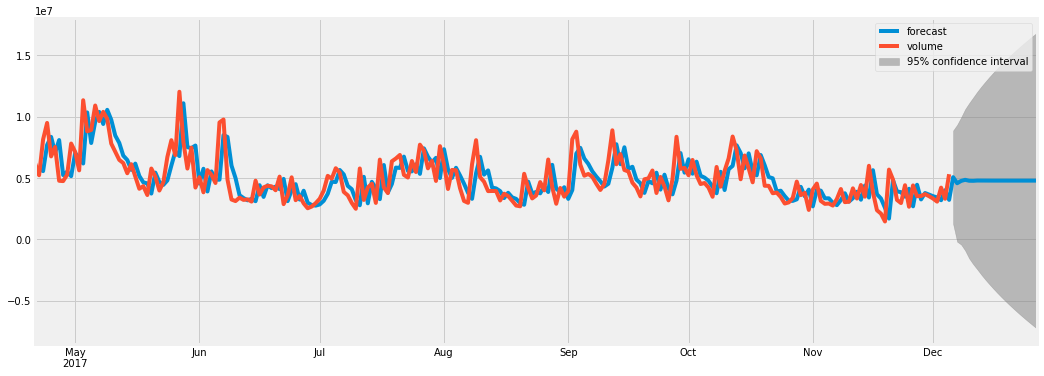

                             ARIMA Model Results                              
Dep. Variable:               D.volume   No. Observations:                 2528
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -40193.001
Method:                       css-mle   S.D. of innovations        1943795.233
Date:                Tue, 02 Feb 2021   AIC                          80394.003
Time:                        15:50:18   BIC                          80417.344
Sample:                    01-04-2011   HQIC                         80402.472
                         - 01-20-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.5443   2.54e+04     -0.000      1.000   -4.98e+04    4.98e+04
ar.L1.D.volume    -0.2465      0.019    -12.896      0.000      -0.284      -0.209
ar.L2.D.volume    -0.2759      0.019

In [56]:
# Predicting amazon colume
rcParams['figure.figsize'] = 16, 6
volume_predict_1 = ARIMA(amazon_daily['volume'], 
                         order=(2,1,0))
arima_volume = volume_predict_1.fit()
arima_volume.plot_predict(start=2300, end=2550)
plt.show()
print(arima_volume.summary())
print('\n RMSE for ARIMA_Volume :', np.sqrt(mean_squared_error(amazon_daily['volume'].iloc[1:2529], arima_volume.predict())))


## Auto ARIMA

In [57]:
from pmdarima.arima import auto_arima


In [74]:
stepwise_model = auto_arima(amazon_daily['close'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=25227.942, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=24600.570, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.49 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=25224.199, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=24051.689, Time=2.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=24054.696, Time=1.91 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=24048.750, Time=3.29 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=24594.262, Time=1.18 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.91 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=24015.184, Time=3.71 sec
 ARIMA(3,1,0)(1,1,0)[12]             : A

In [75]:
stepwise_model.fit(amazon_daily['close'])

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [93]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2529
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -12001.592
Date:                            Tue, 02 Feb 2021   AIC                          24015.184
Time:                                    16:10:54   BIC                          24050.167
Sample:                                         0   HQIC                         24027.880
                                           - 2529                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0372      0.009     -4.048      0.000      -0.055      -0.019
ar.L2          0.0393      0.009      4.407      0.000       0.022       0.057
ar.L3         -0.1188      0.009    -13.367      0.000      -0.136      -0.101
ar.S.L12      -0.6841      0.008    -88.365      0.000      -0.699      -0.669
ar.S.L24      -0.4497      0.009    -51.428      0.000      -0.467      -0.433
sigma2       811.5854      9.341     86.886      0.000     793.278     829.893
===================================================================================
Ljung-Box (Q):                      343.57   Jarque-Bera (JB):             11942.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              58.95   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

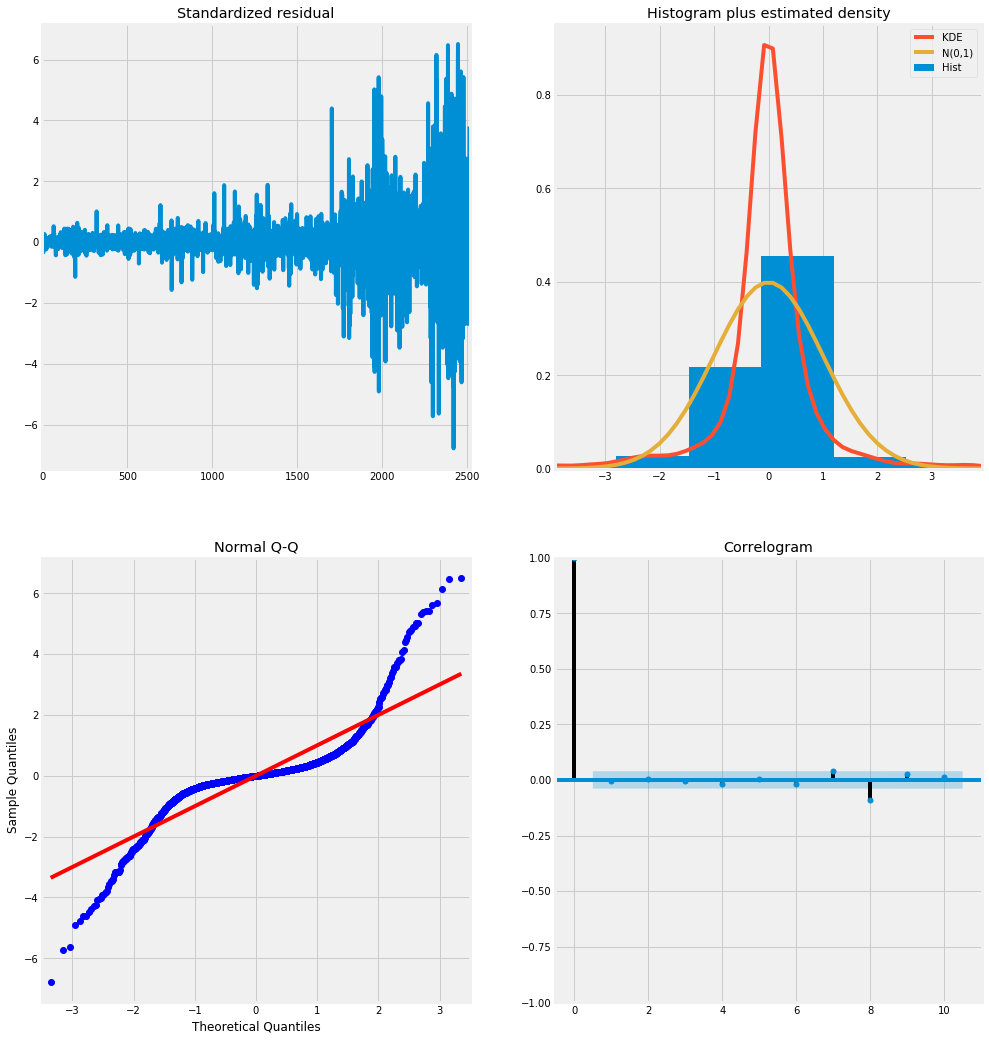

In [95]:
stepwise_model.plot_diagnostics(figsize=(15,18))
plt.show()

## SAIRMA

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

### Tuning with Grid Search

In [58]:
#daily stock info for amazon 
amazon_daily_1 = get_data("amzn", start_date="1/1/2011", end_date="1/21/2021",
                        index_as_date=True, interval="1d")

In [59]:
#Define pdq paramaters
p = d = q = range(0,2)

In [60]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [61]:
#Generate all different cominations of pdq triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [62]:
#run a grid search with pds and seasonal pdq params to get best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(amazon_daily_1['close'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =43265.50029489011
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =39844.52428644041
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =29249.101447539673


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =29117.040508150123


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =29155.46443594481


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =29110.221861143742


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =29127.74295212234


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =29119.13414522946


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =39812.32036884177


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =36486.350272577256


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =27274.099947645293


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =27086.07532131074


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =27226.925047884946


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has 

ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =27273.003149473843
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =27110.927782971088


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =27149.24376363277
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =23613.75342304664


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =23515.44743223082
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =25218.893944622527


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =23442.290371949308
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =23523.8280006953


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =23500.714628564543


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =24496.092873931284


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =23444.068496286036
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =23598.255522522493


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =23500.001635042485


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =25206.654102713626


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =23427.52056419166


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =23516.727635702144


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =23486.310394191223


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =24492.493720839928


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =23429.246463941636


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =23616.63459613823


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =23518.42544556562


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =25099.39824868988


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =23452.821981354413


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =23518.405414123303


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =23504.878843206527


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =24412.767780082602


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =23454.626085313495


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =23599.798283454333


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =23501.537472903146


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =25092.37979201733


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =23437.725397162354


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =23509.912001322664


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =23503.489848672143


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =24414.190627564596


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =23439.476545606474
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =23606.380565577863


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =23508.123413905174
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =25215.151146333737


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/stats

ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =23435.925367422034


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =23508.12363217242


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =23494.563679441017


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =24483.04149877833


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =23437.663314437617


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =23594.66581190697


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =23496.39472488161


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =25130.349559576156


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =23440.465823848703


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =23504.73380108164


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =23482.168145370295


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =24439.392721921336


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =23427.94936141021


In [63]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic           23427.5
Name: 27, dtype: object

In [64]:
#model with optimal paramters
sarima_model = sm.tsa.statespace.SARIMAX(amazon_daily_1['close'],
                                        Order=(0,1,1),
                                        seasonal_order=(0,1,1,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [65]:
#fit the model and print results
output = sarima_model.fit() 
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0005      0.000   2422.403      0.000       1.000       1.001
ma.S.L12      -1.0161      0.004   -287.447      0.000      -1.023      -1.009
sigma2       652.3411      8.043     81.105      0.000     636.577     668.105


In [66]:
print('RMSE for sarima_model :', np.sqrt(mean_squared_error(amazon_daily_1['close'], output.predict())))

RMSE for sarima_model : 26.44342221927052


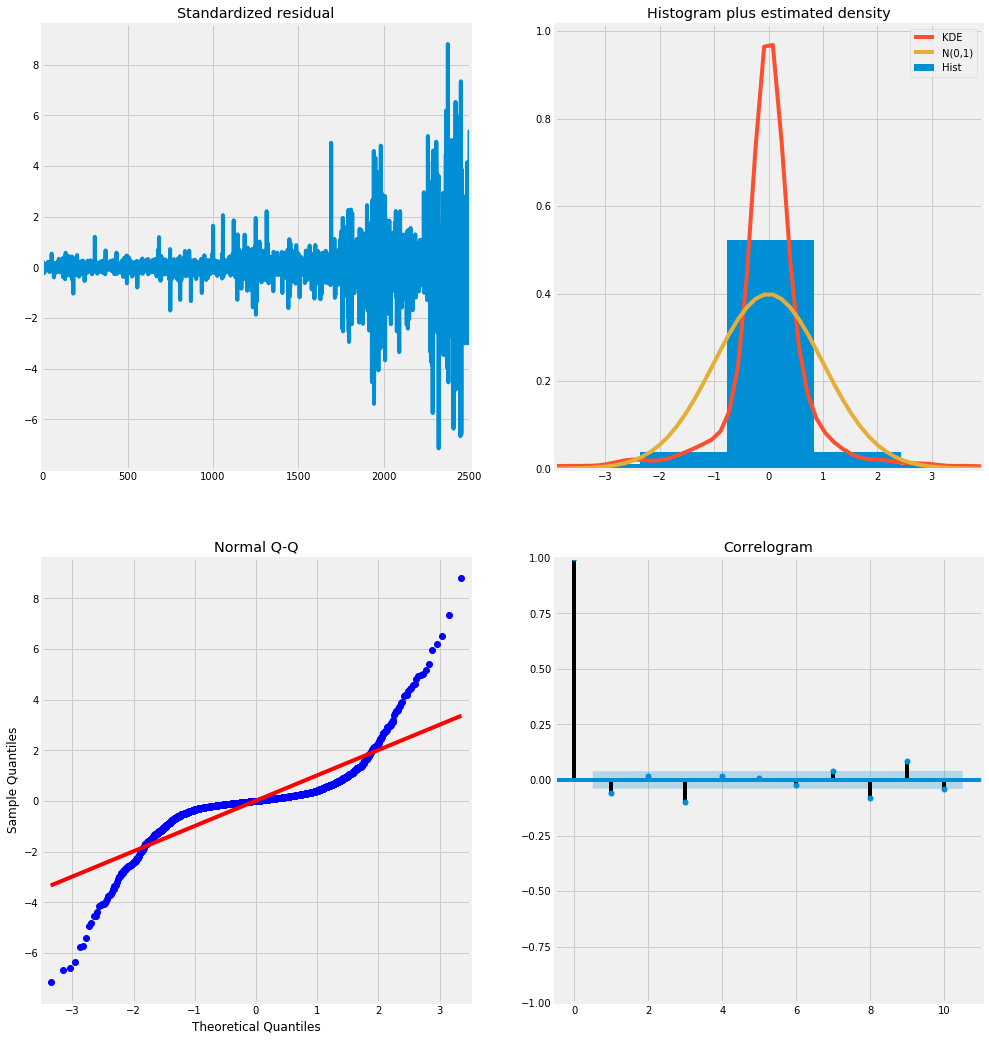

In [67]:
#plot diagnostics for results
output.plot_diagnostics(figsize=(15,18))
plt.show()

In [68]:
#get predictions and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2019-01-02'), dynamic=False)
pred_conf = pred.conf_int()

In [69]:
pred_conf

,lower close,upper close
2019-01-02,1454.258764,1555.998919
2019-01-03,1488.664619,1590.404775
2019-01-04,1448.686711,1550.426866
2019-01-07,1524.276804,1626.016959
2019-01-08,1576.295733,1678.035888
...,...,...
2021-01-13,3073.204337,3174.938724
2021-01-14,3120.346446,3222.080832
2021-01-15,3086.858720,3188.593107
2021-01-19,3050.194831,3151.929218


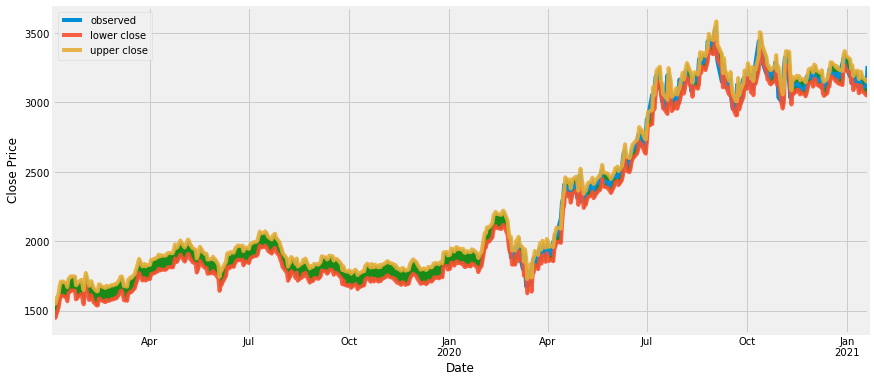

In [70]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 13, 6

# Plot observed values

ax = amazon_daily['close'].iloc[2300:2529].plot(label='observed')

# Plot predicted values

pred_conf.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.9)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.legend()

plt.show()

In [71]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-01-02'),
                                     dynamic=True)
pred_dynamic_conf = pred_dynamic.conf_int()


In [72]:
pred_dynamic_conf

,lower close,upper close
2019-01-02,1454.258764,1555.998919
2019-01-03,1433.559427,1577.475617
2019-01-04,1416.645682,1592.947813
2019-01-07,1402.708311,1606.332430
2019-01-08,1388.261150,1615.973473
...,...,...
2021-01-13,396.140372,3903.965641
2021-01-14,395.258829,3909.161511
2021-01-15,394.361519,3914.336831
2021-01-19,393.166239,3919.209430


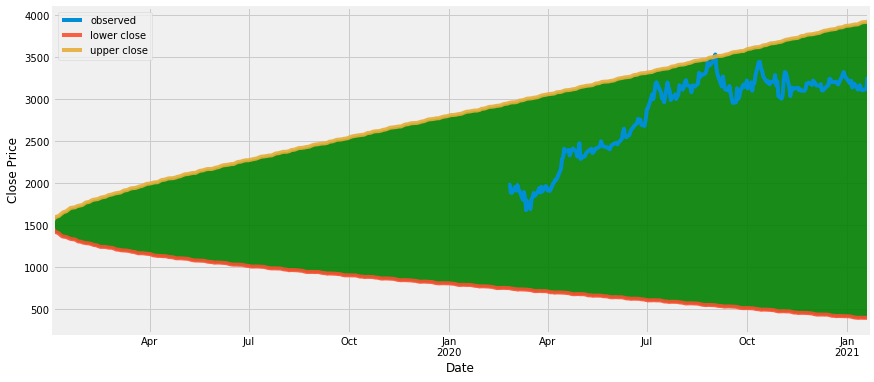

In [73]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 13, 6

# Plot observed values

ax = amazon_daily['close'].iloc[2300:2529].plot(label='observed')

# Plot predicted values

pred_dynamic_conf.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.9)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.legend()

plt.show()